In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load data
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = pd.read_csv('F:\Kuliah\DSA\\raw.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)
# manually specify column names
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
# mark all NA values with 0
dataset['pollution'].fillna(0, inplace=True)
# drop the first 24 hours
dataset = dataset[24:]
# summarize first 5 rows
print(dataset.head(5))
# save to file
dataset.to_csv('pollution.csv')

FileNotFoundError: ignored

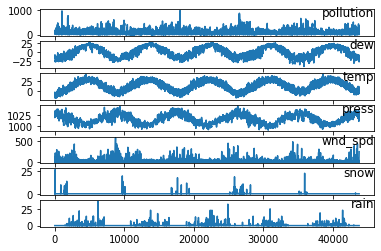

In [4]:
import matplotlib.pyplot as plt
# load dataset
dataset = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/pollution.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [5]:
# prepare data for lstm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [102]:
df = pd.read_excel("/content/drive/MyDrive/finalProjectCompfest/congest_covid.xlsx")
df.drop(columns = 'Unnamed: 0', inplace =True)
df.set_index('Tanggal',inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235 entries, 2021-01-04 to 2021-08-26
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Average Travel Time  235 non-null    float64
 1   Positif Aktif        235 non-null    int64  
 2   Positif Harian       235 non-null    int64  
 3   Sembuh Harian        235 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 9.2 KB


In [469]:
df

,Average Travel Time,Positif Aktif,Positif Harian,Sembuh Harian
Tanggal,,,,
2021-01-04,62.40,12442,1651,1951
2021-01-05,62.40,12952,1491,959
2021-01-06,65.00,13883,2004,1055
2021-01-07,67.08,15032,2141,973
2021-01-08,63.96,15145,2219,2081
...,...,...,...,...
2021-08-22,56.16,6214,522,613
2021-08-23,61.88,5932,260,523
2021-08-24,62.92,5750,347,519


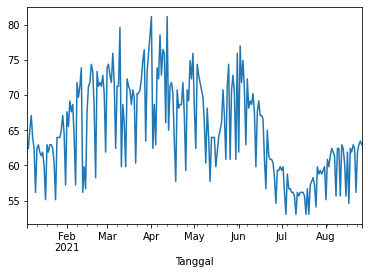

In [430]:
df['Average Travel Time'].plot()

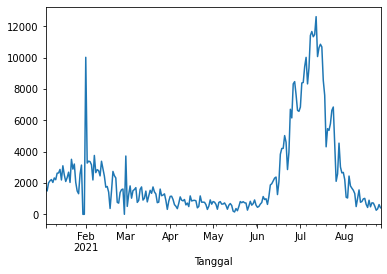

In [431]:
df['Positif Harian'].plot()

In [6]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [148]:
# load dataset
dataset = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/pollution.csv', header=0, index_col=0)
values = dataset.values

In [470]:
values = df.values
values

array([[6.2400e+01, 1.2442e+04, 1.6510e+03, 1.9510e+03],
       [6.2400e+01, 1.2952e+04, 1.4910e+03, 9.5900e+02],
       [6.5000e+01, 1.3883e+04, 2.0040e+03, 1.0550e+03],
       [6.7080e+01, 1.5032e+04, 2.1410e+03, 9.7300e+02],
       [6.3960e+01, 1.5145e+04, 2.2190e+03, 2.0810e+03],
       [6.2400e+01, 1.5248e+04, 2.0340e+03, 1.9130e+03],
       [5.6160e+01, 1.4784e+04, 2.3210e+03, 2.7570e+03],
       [6.2400e+01, 1.4760e+04, 2.2080e+03, 2.1990e+03],
       [6.2920e+01, 1.6081e+04, 2.6230e+03, 1.2690e+03],
       [6.1880e+01, 1.6136e+04, 2.6390e+03, 2.5430e+03],
       [6.1360e+01, 1.7363e+04, 2.8640e+03, 1.5990e+03],
       [6.1880e+01, 1.7615e+04, 2.1910e+03, 1.9050e+03],
       [5.9800e+01, 1.8730e+04, 3.0970e+03, 1.9480e+03],
       [5.5120e+01, 1.7917e+04, 2.5140e+03, 3.2940e+03],
       [6.2920e+01, 1.7639e+04, 2.0950e+03, 2.3410e+03],
       [6.1880e+01, 1.6335e+04, 2.3410e+03, 3.6250e+03],
       [6.2920e+01, 1.7378e+04, 2.6880e+03, 1.6140e+03],
       [6.2920e+01, 1.7162e+04,

In [9]:
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])

In [471]:
# ensure all data is float
values = values.astype('float32')
values

array([[6.2400e+01, 1.2442e+04, 1.6510e+03, 1.9510e+03],
       [6.2400e+01, 1.2952e+04, 1.4910e+03, 9.5900e+02],
       [6.5000e+01, 1.3883e+04, 2.0040e+03, 1.0550e+03],
       [6.7080e+01, 1.5032e+04, 2.1410e+03, 9.7300e+02],
       [6.3960e+01, 1.5145e+04, 2.2190e+03, 2.0810e+03],
       [6.2400e+01, 1.5248e+04, 2.0340e+03, 1.9130e+03],
       [5.6160e+01, 1.4784e+04, 2.3210e+03, 2.7570e+03],
       [6.2400e+01, 1.4760e+04, 2.2080e+03, 2.1990e+03],
       [6.2920e+01, 1.6081e+04, 2.6230e+03, 1.2690e+03],
       [6.1880e+01, 1.6136e+04, 2.6390e+03, 2.5430e+03],
       [6.1360e+01, 1.7363e+04, 2.8640e+03, 1.5990e+03],
       [6.1880e+01, 1.7615e+04, 2.1910e+03, 1.9050e+03],
       [5.9800e+01, 1.8730e+04, 3.0970e+03, 1.9480e+03],
       [5.5120e+01, 1.7917e+04, 2.5140e+03, 3.2940e+03],
       [6.2920e+01, 1.7639e+04, 2.0950e+03, 2.3410e+03],
       [6.1880e+01, 1.6335e+04, 2.3410e+03, 3.6250e+03],
       [6.2920e+01, 1.7378e+04, 2.6880e+03, 1.6140e+03],
       [6.2920e+01, 1.7162e+04,

In [472]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [636]:
df

,Average Travel Time,Positif Aktif,Positif Harian,Sembuh Harian
Tanggal,,,,
2021-01-04,62.40,12442,1651,1951
2021-01-05,62.40,12952,1491,959
2021-01-06,65.00,13883,2004,1055
2021-01-07,67.08,15032,2141,973
2021-01-08,63.96,15145,2219,2081
...,...,...,...,...
2021-08-22,56.16,6214,522,613
2021-08-23,61.88,5932,260,523
2021-08-24,62.92,5750,347,519


In [750]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [751]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[4,5,7]], axis=1, inplace=True)
print(reframed.head())

# split into train and test sets
values = reframed.values
n_train = 200
train = values[:n_train, :]
test = values[n_train:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var3(t)
1   0.333333   0.127595   0.130897   0.106102  0.118211
2   0.333333   0.132825   0.118211   0.052154  0.158884
3   0.425926   0.142372   0.158884   0.057374  0.169746
4   0.500000   0.154155   0.169746   0.052915  0.175930
5   0.388889   0.155314   0.175930   0.113172  0.161262
(200, 1, 4) (200,) (34, 1, 4) (34,)


In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [752]:
# design network
model = keras.Sequential()
model.add(layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(layers.Dense(1))
model.compile(loss='mae', optimizer='adam')

In [753]:
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=16, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/100
13/13 - 2s - loss: 0.1771 - val_loss: 0.0683
Epoch 2/100
13/13 - 0s - loss: 0.1322 - val_loss: 0.0533
Epoch 3/100
13/13 - 0s - loss: 0.1205 - val_loss: 0.0522
Epoch 4/100
13/13 - 0s - loss: 0.1121 - val_loss: 0.0505
Epoch 5/100
13/13 - 0s - loss: 0.1041 - val_loss: 0.0488
Epoch 6/100
13/13 - 0s - loss: 0.0964 - val_loss: 0.0487
Epoch 7/100
13/13 - 0s - loss: 0.0885 - val_loss: 0.0525
Epoch 8/100
13/13 - 0s - loss: 0.0812 - val_loss: 0.0582
Epoch 9/100
13/13 - 0s - loss: 0.0752 - val_loss: 0.0620
Epoch 10/100
13/13 - 0s - loss: 0.0699 - val_loss: 0.0633
Epoch 11/100
13/13 - 0s - loss: 0.0659 - val_loss: 0.0669
Epoch 12/100
13/13 - 0s - loss: 0.0637 - val_loss: 0.0698
Epoch 13/100
13/13 - 0s - loss: 0.0624 - val_loss: 0.0705
Epoch 14/100
13/13 - 0s - loss: 0.0613 - val_loss: 0.0708
Epoch 15/100
13/13 - 0s - loss: 0.0604 - val_loss: 0.0699
Epoch 16/100
13/13 - 0s - loss: 0.0596 - val_loss: 0.0700
Epoch 17/100
13/13 - 0s - loss: 0.0588 - val_loss: 0.0692
Epoch 18/100
13/13 - 0s

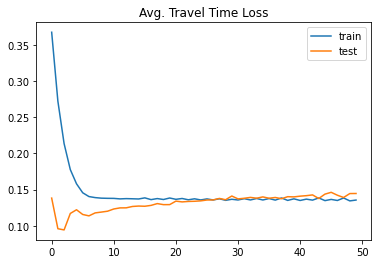

In [652]:
# plot history batch 8
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Avg. Travel Time Loss")
plt.show()

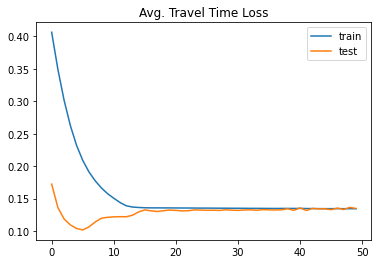

In [664]:
# plot history batch 16
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Avg. Travel Time Loss")
plt.show()

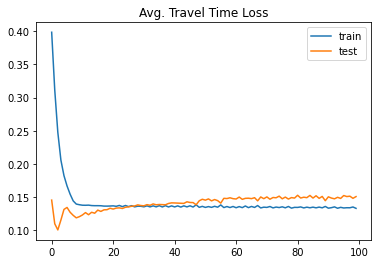

In [676]:
# plot history batch 8 epoch 100
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Avg. Travel Time Loss")
plt.show()

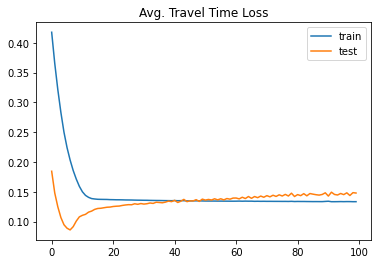

In [685]:
# plot history batch 16 epoch 100
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Avg. Travel Time Loss")
plt.show()

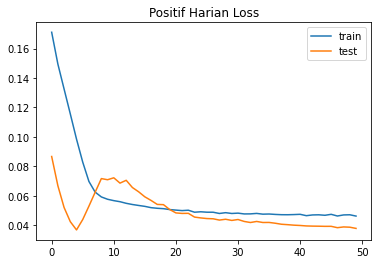

In [587]:
# plot history batch 8
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Positif Harian Loss")
plt.show()

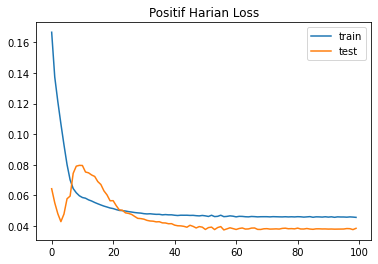

In [740]:
# plot history batch 8 epoch 100
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Positif Harian Loss")
plt.show()

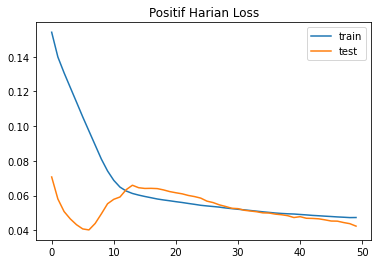

In [640]:
# plot history batch 16
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Positif Harian Loss")
plt.show()

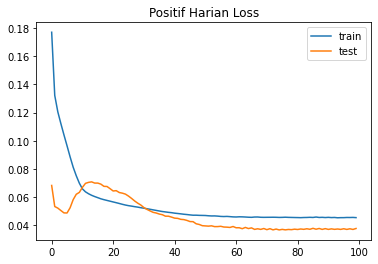

In [754]:
# plot history batch 16 epoch 100
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Positif Harian Loss")
plt.show()

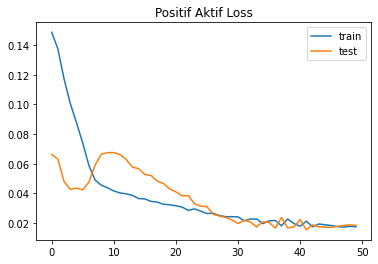

In [609]:
# plot history batch 8
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Positif Aktif Loss")
plt.show()

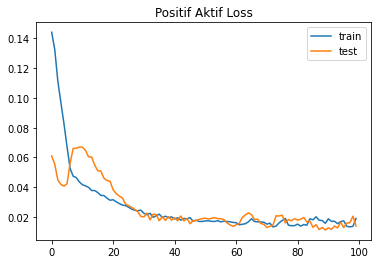

In [714]:
# plot history batch 8 epoch 100
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Positif Aktif Loss")
plt.show()

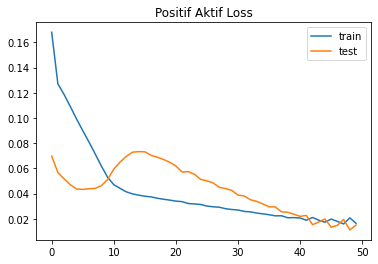

In [627]:
# plot history batch 16
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Positif Aktif Loss")
plt.show()

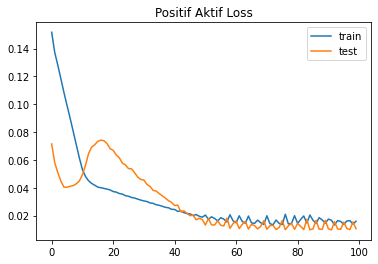

In [724]:
# plot history batch 16 epoch 100
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Positif Aktif Loss")
plt.show()

In [755]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecast
inv_yhat = np.concatenate((test[:,0:2], yhat,test_X[:,2:3]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,2]
inv_yhat

array([6705.2217 , 6689.017  , 4534.3477 , 2594.3225 , 2689.0686 ,
       4069.878  , 2743.731  , 2293.3633 , 2368.814  , 1928.8862 ,
       1179.4261 , 1105.0487 , 2153.919  , 1687.3857 , 1544.4133 ,
       1376.3984 , 1216.3278 ,  654.05554, 1022.01086, 1378.8306 ,
        831.9715 ,  851.8894 ,  967.23083,  962.443  ,  712.77783,
        535.11505,  907.0548 ,  593.9145 ,  780.22577,  768.9517 ,
        595.86945,  427.4283 ,  487.98825,  691.4796 ], dtype=float32)

In [756]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X[:,0:2], test_y,test_X[:,2:3]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,2]
inv_y

array([6845.9995 , 4471.     , 2106.     , 2579.     , 4541.     ,
       3019.     , 2645.     , 2673.     , 2217.     , 1085.     ,
       1042.     , 2441.     , 1812.9999 , 1666.0001 , 1536.     ,
       1327.     ,  494.     , 1013.00006, 1556.     ,  768.     ,
        816.     ,  986.00006, 1018.00006,  629.     ,  437.     ,
        900.00006,  481.     ,  733.     ,  720.     ,  522.     ,
        260.     ,  347.     ,  622.     ,  418.     ], dtype=float32)

In [48]:
import math
import sklearn.metrics as mt

In [616]:
# calculate RMSE
rmse = math.sqrt(mt.mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2356.300


In [757]:
y_predict_harian = pd.DataFrame(inv_yhat)
y_actual_harian = pd.DataFrame(inv_y)
y_predict_harian.rename(columns={0:'Prediction'},inplace=True)
y_actual_harian.rename(columns={0:'Actual'},inplace=True)
y_harian = pd.concat([y_predict_harian,y_actual_harian],axis = 1)
y_harian.set_index(df.index[-34:], inplace=True)

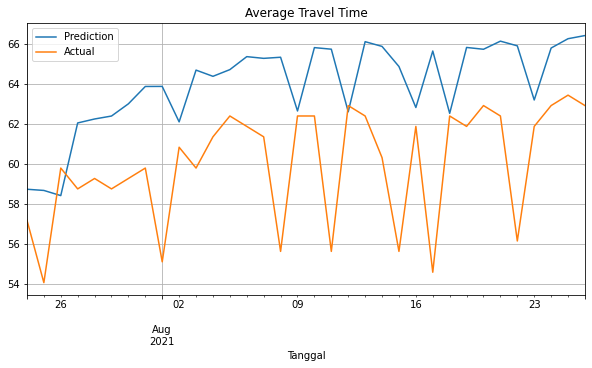

In [656]:
#batch = 8
fig, ax = plt.subplots(figsize=(10,5))
y_att.plot(legend = True, ax = ax, grid = True, title = 'Average Travel Time')

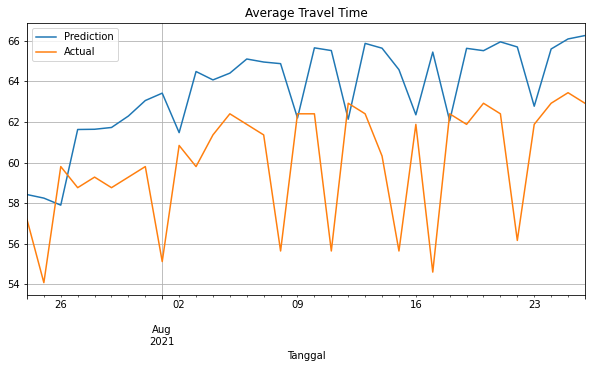

In [669]:
#batch = 16
fig, ax = plt.subplots(figsize=(10,5))
y_att.plot(legend = True, ax = ax, grid = True, title = 'Average Travel Time')

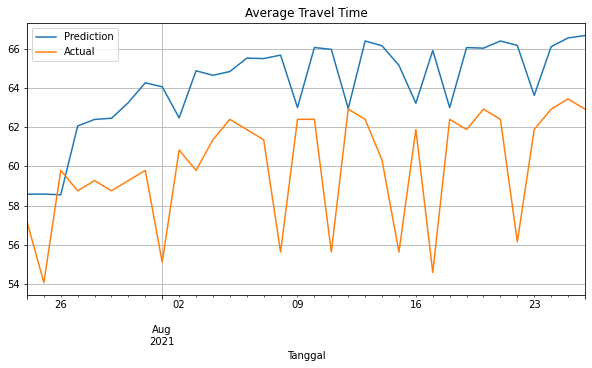

In [700]:
#batch = 8 epoch = 100
fig, ax = plt.subplots(figsize=(10,5))
y_att.plot(legend = True, ax = ax, grid = True, title = 'Average Travel Time')

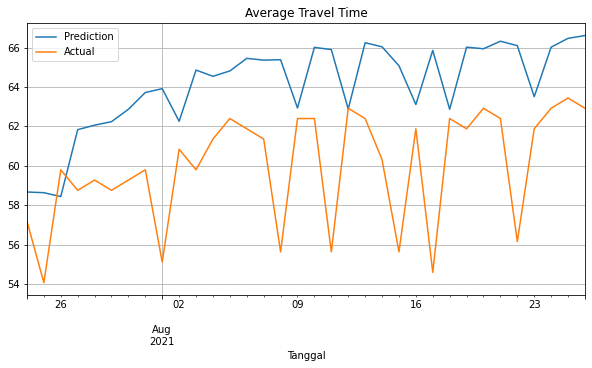

In [689]:
#batch = 16 epoch = 100
fig, ax = plt.subplots(figsize=(10,5))
y_att.plot(legend = True, ax = ax, grid = True, title = 'Average Travel Time')

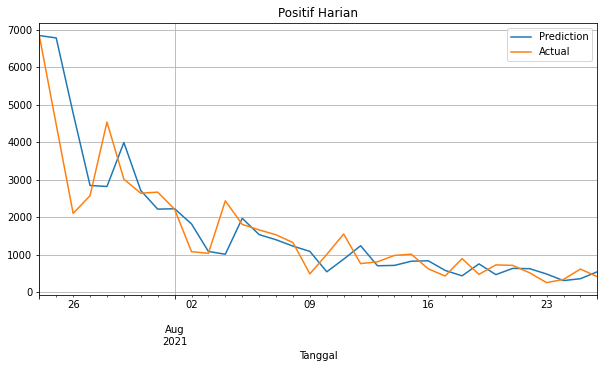

In [586]:
#batch = 8
fig, ax = plt.subplots(figsize=(10,5))
y_harian.plot(legend = True, ax = ax, grid = True, title = 'Positif Harian')

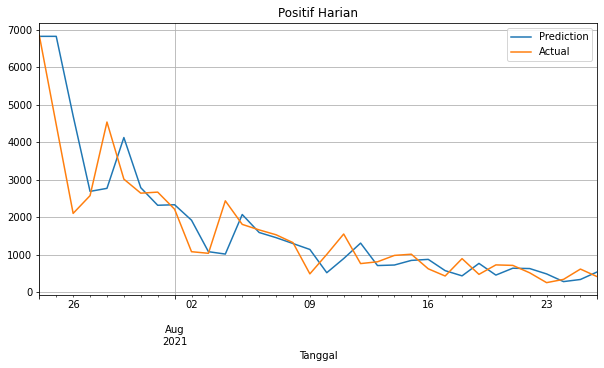

In [744]:
#batch = 8 epoch 100
fig, ax = plt.subplots(figsize=(10,5))
y_harian.plot(legend = True, ax = ax, grid = True, title = 'Positif Harian')

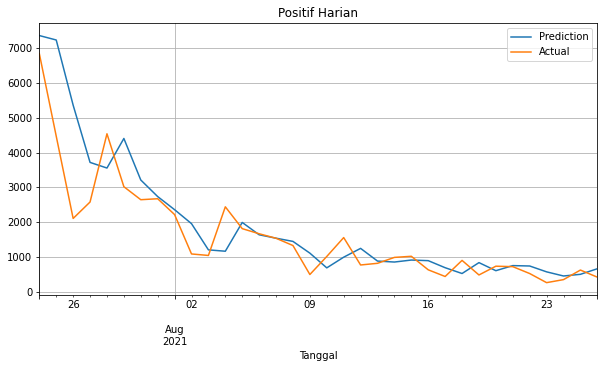

In [646]:
#batch = 16
fig, ax = plt.subplots(figsize=(10,5))
y_harian.plot(legend = True, ax = ax, grid = True, title = 'Positif Harian')

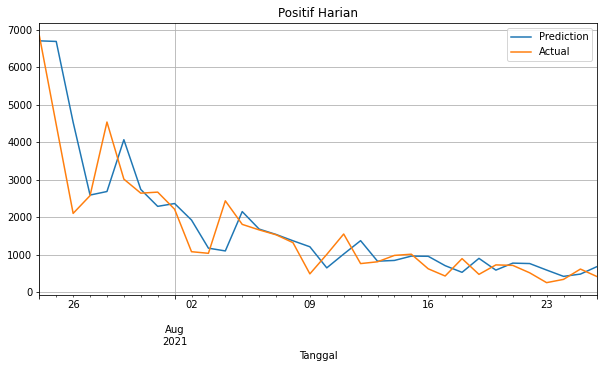

In [758]:
#batch = 16 epoch 100
fig, ax = plt.subplots(figsize=(10,5))
y_harian.plot(legend = True, ax = ax, grid = True, title = 'Positif Harian')

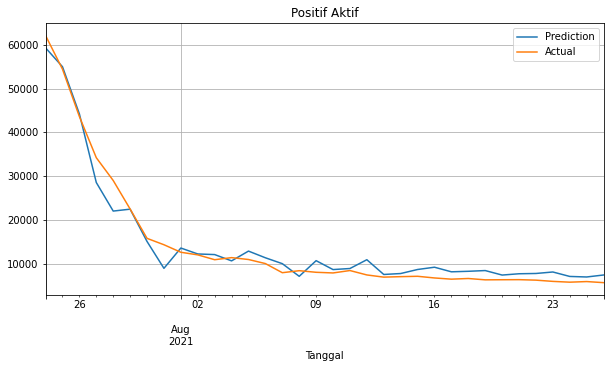

In [621]:
#batch = 8
fig, ax = plt.subplots(figsize=(10,5))
y_aktif.plot(legend = True, ax = ax, grid = True, title = 'Positif Aktif')

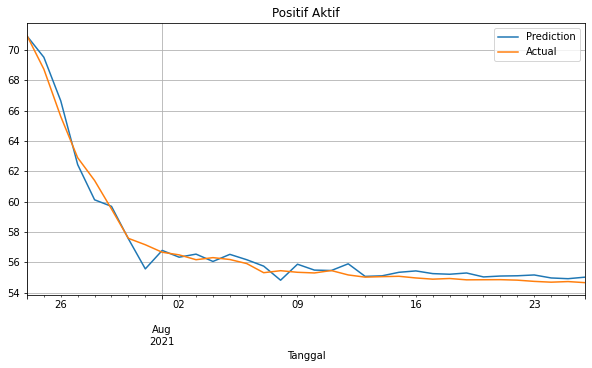

In [718]:
#batch = 8 epoch = 100
fig, ax = plt.subplots(figsize=(10,5))
y_aktif.plot(legend = True, ax = ax, grid = True, title = 'Positif Aktif')

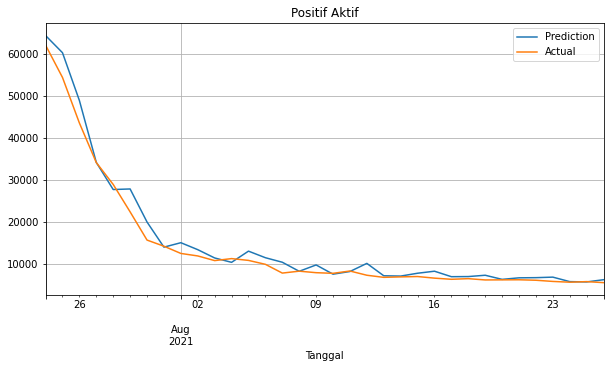

In [633]:
#batch = 16
fig, ax = plt.subplots(figsize=(10,5))
y_aktif.plot(legend = True, ax = ax, grid = True, title = 'Positif Aktif')

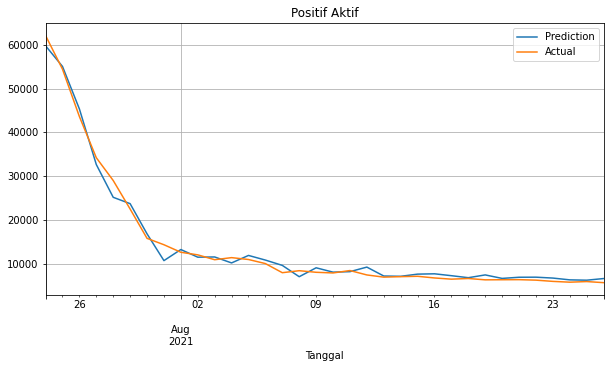

In [730]:
#batch = 16 epoch 100
fig, ax = plt.subplots(figsize=(10,5))
y_aktif.plot(legend = True, ax = ax, grid = True, title = 'Positif Aktif')

In [433]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})
    
def adjust(val, length= 6): 
  return str(val).ljust(length)

In [658]:
#batch 8
print('Forecast Accuracy of: Avg. Travel Time')
accuracy_prod = forecast_accuracy(y_att['Prediction'].values, y_att['Actual'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Avg. Travel Time
mape   :  0.0696
me     :  3.9589
mae    :  4.0581
mpe    :  0.068
rmse   :  5.0169
corr   :  0.2623
minmax :  0.0628


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [701]:
#batch 8 epoch 100
print('Forecast Accuracy of: Avg. Travel Time')
accuracy_prod = forecast_accuracy(y_att['Prediction'].values, y_att['Actual'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Avg. Travel Time
mape   :  0.0731
me     :  4.1947
mae    :  4.2678
mpe    :  0.0719
rmse   :  5.2031
corr   :  0.2792
minmax :  0.0658


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [670]:
#batch 16
print('Forecast Accuracy of: Avg. Travel Time')
accuracy_prod = forecast_accuracy(y_att['Prediction'].values, y_att['Actual'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Avg. Travel Time
mape   :  0.0649
me     :  3.5914
mae    :  3.7818
mpe    :  0.0618
rmse   :  4.7676
corr   :  0.2616
minmax :  0.0588


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [690]:
#batch 16 epoch 100
print('Forecast Accuracy of: Avg. Travel Time')
accuracy_prod = forecast_accuracy(y_att['Prediction'].values, y_att['Actual'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Avg. Travel Time
mape   :  0.0712
me     :  4.0717
mae    :  4.1537
mpe    :  0.0698
rmse   :  5.1029
corr   :  0.2807
minmax :  0.0642


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [622]:
#batch 8
print('Forecast Accuracy of: Positif Aktif')
accuracy_prod = forecast_accuracy(y_aktif['Prediction'].values, y_aktif['Actual'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Positif Aktif
mape   :  0.1816
me     :  398.4321
mae    :  1789.3909
mpe    :  0.1173
rmse   :  2356.3005
corr   :  0.9878
minmax :  0.1508


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [719]:
#batch 8 epoch 100
print('Forecast Accuracy of: Positif Aktif')
accuracy_prod = forecast_accuracy(y_aktif['Prediction'].values, y_aktif['Actual'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Positif Aktif
mape   :  0.0068
me     :  0.1309
mae    :  0.3899
mpe    :  0.0023
rmse   :  0.5208
corr   :  0.9922
minmax :  0.0067


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [634]:
#batch 16
print('Forecast Accuracy of: Positif Aktif')
accuracy_prod = forecast_accuracy(y_aktif['Prediction'].values, y_aktif['Actual'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Positif Aktif
mape   :  0.1163
me     :  1310.7686
mae    :  1471.7065
mpe    :  0.1051
rmse   :  2177.1836
corr   :  0.9949
minmax :  0.098


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [732]:
#batch 16 epoch 100
print('Forecast Accuracy of: Positif Aktif')
accuracy_prod = forecast_accuracy(y_aktif['Prediction'].values, y_aktif['Actual'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Positif Aktif
mape   :  0.0923
me     :  161.7898
mae    :  1029.5095
mpe    :  0.0444
rmse   :  1337.9205
corr   :  0.9957
minmax :  0.0847


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [588]:
#batch 8
print('Forecast Accuracy of: Positif Harian')
accuracy_prod = forecast_accuracy(y_harian['Prediction'].values, y_harian['Actual'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Positif Harian
mape   :  0.3497
me     :  80.4485
mae    :  475.9518
mpe    :  0.0959
rmse   :  790.7046
corr   :  0.8792
minmax :  0.2591


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [749]:
#batch 8 epoch 100
print('Forecast Accuracy of: Positif Harian')
accuracy_prod = forecast_accuracy(y_harian['Prediction'].values, y_harian['Actual'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Positif Harian
mape   :  0.3614
me     :  100.22
mae    :  484.6307
mpe    :  0.1106
rmse   :  799.398
corr   :  0.8774
minmax :  0.2635


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [647]:
#batch 16
print('Forecast Accuracy of: Positif Harian')
accuracy_prod = forecast_accuracy(y_harian['Prediction'].values, y_harian['Actual'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Positif Harian
mape   :  0.3905
me     :  295.4597
mae    :  533.9675
mpe    :  0.2447
rmse   :  895.1907
corr   :  0.8897
minmax :  0.2571


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [759]:
#batch 16 epoch 100
print('Forecast Accuracy of: Positif Harian')
accuracy_prod = forecast_accuracy(y_harian['Prediction'].values, y_harian['Actual'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Positif Harian
mape   :  0.3863
me     :  156.5237
mae    :  475.588
mpe    :  0.2209
rmse   :  772.886
corr   :  0.8764
minmax :  0.2534


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
